# Ejemplo formación data science
## 1. Extracción de datos
### 1. ¿Cuántos datos faltantes tenemos?

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('empleados.csv', delimiter=";")

In [3]:
print(df.head(20))

       Nombre  Apellido       Sexo   Estado_Civil  Edad  Experiencia  Salario  \
0   Alexandro       NaN  Masculino     Soltero(a)  22.0          3.0   2423.0   
1      Carlos       NaN  Masculino      Casado(a)  38.0         10.0   3132.0   
2      Felipa       NaN   Femenino     Soltero(a)  26.0          5.0   2639.0   
3      Daniel       NaN  Masculino      Casado(a)  35.0         10.0   3122.0   
4        John       NaN  Masculino      Casado(a)  35.0         13.0   3431.0   
5      Edward       NaN  Masculino     Soltero(a)   NaN          NaN   4500.0   
6     Ruperta       NaN   Femenino      Casado(a)  54.0         18.0   3962.0   
7       Amaya       NaN   Femenino  Divorciado(a)  22.0          3.0   2450.0   
8   Francisca       NaN   Femenino     Soltero(a)  27.0          4.0   2564.0   
9      Selena       NaN   Femenino      Casado(a)  24.0          6.0   2709.0   
10       Febe       NaN   Femenino      Casado(a)  44.0         22.0   4359.0   
11     Ximena       NaN   Fe

In [4]:
print(df.shape)

(251, 9)


In [5]:
print(df.isnull().sum())

Nombre            6
Apellido        251
Sexo             37
Estado_Civil      4
Edad             61
Experiencia       4
Salario           6
Gerencia         21
Departamento     12
dtype: int64


In [6]:
print(df.notnull().sum())

Nombre          245
Apellido          0
Sexo            214
Estado_Civil    247
Edad            190
Experiencia     247
Salario         245
Gerencia        230
Departamento    239
dtype: int64


### 2. Eliminar las columnas con datos faltantes

In [7]:
df_1_2 = df.drop(axis=1, columns=['Apellido'])

In [8]:
print(df_1_2.head(20))

       Nombre       Sexo   Estado_Civil  Edad  Experiencia  Salario Gerencia  \
0   Alexandro  Masculino     Soltero(a)  22.0          3.0   2423.0       No   
1      Carlos  Masculino      Casado(a)  38.0         10.0   3132.0       Sí   
2      Felipa   Femenino     Soltero(a)  26.0          5.0   2639.0       No   
3      Daniel  Masculino      Casado(a)  35.0         10.0   3122.0       No   
4        John  Masculino      Casado(a)  35.0         13.0   3431.0       Sí   
5      Edward  Masculino     Soltero(a)   NaN          NaN   4500.0       No   
6     Ruperta   Femenino      Casado(a)  54.0         18.0   3962.0       No   
7       Amaya   Femenino  Divorciado(a)  22.0          3.0   2450.0      NaN   
8   Francisca   Femenino     Soltero(a)  27.0          4.0   2564.0       No   
9      Selena   Femenino      Casado(a)  24.0          6.0   2709.0       Sí   
10       Febe   Femenino      Casado(a)  44.0         22.0   4359.0       No   
11     Ximena   Femenino     Soltero(a) 

### 3. Eliminar las filas con datos faltantes

La siguiente función evalua las filas, por eso `axis=0`, y si tiene menos de 5 valores no nulos la elimina.

In [9]:
df_1_3 = df_1_2.dropna(axis=0, thresh=5).copy()

In [10]:
print(df_1_3)

        Nombre       Sexo   Estado_Civil  Edad  Experiencia  Salario Gerencia  \
0    Alexandro  Masculino     Soltero(a)  22.0          3.0   2423.0       No   
1       Carlos  Masculino      Casado(a)  38.0         10.0   3132.0       Sí   
2       Felipa   Femenino     Soltero(a)  26.0          5.0   2639.0       No   
3       Daniel  Masculino      Casado(a)  35.0         10.0   3122.0       No   
4         John  Masculino      Casado(a)  35.0         13.0   3431.0       Sí   
..         ...        ...            ...   ...          ...      ...      ...   
246       Jose  Masculino      Casado(a)  30.0          6.0   2760.0       No   
247    Marcelo  Masculino  Divorciado(a)  44.0         15.0   3616.0       No   
248       Eric        NaN      Casado(a)  25.0          7.0   2880.0       Sí   
249       Marc        NaN      Casado(a)  24.0          2.0   2172.0       No   
250    Leandro  Masculino      Casado(a)  37.0         11.0   3245.0       No   

             Departamento  

### 4. Verificar duplicados.

In [11]:
duplicados = df_1_3.duplicated()

In [12]:
print(df_1_3[duplicados])

    Nombre       Sexo Estado_Civil  Edad  Experiencia  Salario Gerencia  \
14  Selena   Femenino    Casado(a)  24.0          6.0   2709.0       Sí   
65   Lucio  Masculino   Soltero(a)  54.0         12.0   3317.0       No   

        Departamento  
14      Contabilidad  
65  Recursos Humanos  


### 5. Eliminar duplicados.

In [13]:
df_1_5 = df_1_3.drop_duplicates().copy()

In [14]:
print(df_1_5)

        Nombre       Sexo   Estado_Civil  Edad  Experiencia  Salario Gerencia  \
0    Alexandro  Masculino     Soltero(a)  22.0          3.0   2423.0       No   
1       Carlos  Masculino      Casado(a)  38.0         10.0   3132.0       Sí   
2       Felipa   Femenino     Soltero(a)  26.0          5.0   2639.0       No   
3       Daniel  Masculino      Casado(a)  35.0         10.0   3122.0       No   
4         John  Masculino      Casado(a)  35.0         13.0   3431.0       Sí   
..         ...        ...            ...   ...          ...      ...      ...   
246       Jose  Masculino      Casado(a)  30.0          6.0   2760.0       No   
247    Marcelo  Masculino  Divorciado(a)  44.0         15.0   3616.0       No   
248       Eric        NaN      Casado(a)  25.0          7.0   2880.0       Sí   
249       Marc        NaN      Casado(a)  24.0          2.0   2172.0       No   
250    Leandro  Masculino      Casado(a)  37.0         11.0   3245.0       No   

             Departamento  

### 6. Rellenar datos faltantes.

En este caso, calcula la media de edad de todos los datos y se la asigna a aquellos que tienen valor nulo.

In [15]:
df_1_6 = df_1_5.copy()
df_1_6['Edad'] = df_1_6['Edad'].fillna(df_1_6['Edad'].mean())

In [16]:
print(df_1_6.isnull().sum())

Nombre           4
Sexo            33
Estado_Civil     0
Edad             0
Experiencia      1
Salario          2
Gerencia        16
Departamento     8
dtype: int64


### 7. Modelo de regresión.

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regresion_lineal = LinearRegression()

In [19]:
df_1_7 = df_1_5[["Edad","Experiencia","Salario"]].copy()

In [20]:
datos_test = df_1_7[df_1_7['Edad'].isnull()==True].copy()
datos_test.dropna(axis=0, thresh=2)

,Edad,Experiencia,Salario
18,NaN,10.0,3194.0
20,NaN,15.0,3635.0
27,NaN,24.0,4529.0
29,NaN,18.0,3907.0
30,NaN,5.0,2656.0
33,NaN,7.0,2835.0
37,NaN,5.0,2676.0
43,NaN,6.0,2709.0
46,NaN,9.0,3027.0
47,NaN,10.0,3128.0


In [21]:
datos_entrenamiento = df_1_7[df_1_7['Edad'].isnull()==False].copy()
datos_entrenamiento.dropna(axis=0, inplace=True)

In [22]:
y_entrenamiento = datos_entrenamiento['Edad']

In [23]:
x_entrenamiento = datos_entrenamiento.drop("Edad",axis=1)

In [24]:
regresion_lineal.fit(x_entrenamiento,y_entrenamiento)

LinearRegression()

In [25]:
datos_test = datos_test.drop('Edad',axis=1)
datos_test = datos_test.dropna()

In [26]:
predicciones = regresion_lineal.predict(datos_test)

In [27]:
print(predicciones)

[38.2183411  44.17563872 55.82660757 47.8185399  31.36284175 33.7698363
 31.54803798 32.2283559  36.29720841 37.60719353 43.98118267 56.96065626
 44.37009477 62.75127726 24.66911085 26.21985107 55.97476455 60.28437218
 23.13198211 34.92240462 32.83024366 50.52184843 31.6406361  57.34030854
 55.1833289  37.48681598 51.78553449 63.51058183 63.97357241 29.74728285
 47.76298103 58.30768062 38.73198241 41.55566849 29.09474436 46.88820706
 66.50094452 36.59352239 62.84878353 26.09947352 57.09955343 39.57462527
 27.50205675 46.81412857 64.18654808 46.05047235 55.70623001 42.61563869
 55.96550474 35.542812   25.72908105 45.79119762 69.99568871 50.96631939
 55.65067114]


In [28]:
datos_test['Edad']= predicciones
test_index = datos_test.index
df_1_7.loc[test_index, 'Edad'] = predicciones

In [29]:
print(df_1_7.head(20))

         Edad  Experiencia  Salario
0   22.000000          3.0   2423.0
1   38.000000         10.0   3132.0
2   26.000000          5.0   2639.0
3   35.000000         10.0   3122.0
4   35.000000         13.0   3431.0
5         NaN          NaN   4500.0
6   54.000000         18.0   3962.0
7   22.000000          3.0   2450.0
8   27.000000          4.0   2564.0
9   24.000000          6.0   2709.0
10  44.000000         22.0   4359.0
11  58.000000         24.0   4532.0
12  20.000000          1.0   1977.0
13  39.000000          8.0   2953.0
16  55.000000         12.0   3306.0
17  22.000000          4.0   2518.0
18  38.218341         10.0   3194.0
19  31.000000         11.0   3267.0
20  44.175639         15.0   3635.0
21  35.000000          8.0   2973.0


## 2. Análisis de datos

### 1. Correlación

In [30]:
import seaborn as sns

In [31]:
df_2 = pd.read_csv('empleados2.csv', delimiter=";")

In [32]:
print(df_2.head(20))

       Nombre       Sexo   Estado_Civil  Edad  Experiencia  Salario Gerencia  \
0   Alexandro  Masculino     Soltero(a)    22            3     2423       No   
1      Felipa   Femenino     Soltero(a)    26            5     2639       No   
2      Daniel  Masculino      Casado(a)    35           10     3122       No   
3        John  Masculino      Casado(a)    35           13     3431       Sí   
4     Ruperta   Femenino      Casado(a)    54           18     3962       No   
5   Francisca   Femenino     Soltero(a)    27            4     2564       No   
6      Selena   Femenino      Casado(a)    24            6     2709       Sí   
7      Ximena   Femenino     Soltero(a)    58           24     4532       No   
8       David  Masculino  Divorciado(a)    20            1     1977       No   
9         Max  Masculino  Divorciado(a)    39            8     2953       No   
10      Paula   Femenino  Divorciado(a)    55           12     3306       No   
11        Tim  Masculino  Divorciado(a) 

In [33]:
df_2['Experiencia'].corr(df['Salario'])

0.0961549318542758

Para representar la correlación de los datos numéricos entre sí hacemos lo siguiente

<Axes: >

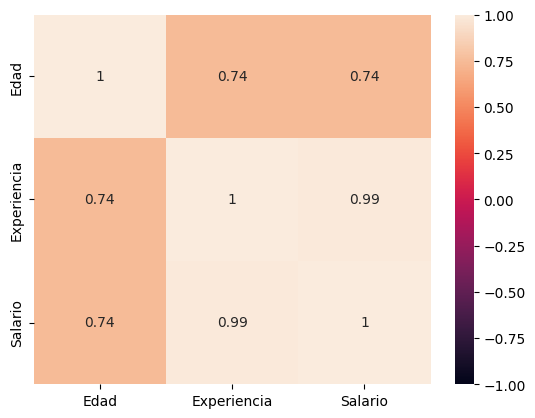

In [34]:
sns.heatmap(df_2.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)

### 2. Calcular la media de las columnas

In [35]:
df_2_2 = df_2[["Edad","Experiencia","Salario"]].copy()

In [36]:
print(df_2_2.mean(axis=0))

Edad             33.797203
Experiencia       6.867133
Salario        2778.657343
dtype: float64


### 3. Estadísticas básicas

In [37]:
df_2_3 = pd.read_csv('temperaturas.csv', delimiter=";")

Temperatura mínima

In [38]:
print(df_2_3['temperatura'].min())

70.9


Temperatura máxima

In [39]:
print(df_2_3['temperatura'].max())

75.3


Temperatura media

In [40]:
print(df_2_3['temperatura'].mean())

72.62419354838711


Desviación típica

In [41]:
print(df_2_3['temperatura'].std())

1.0573219315056979


Varianza

In [42]:
print(df_2_3['temperatura'].var())

1.1179296668429395


### 4. Normalizar datos

En este apartado vamos a normalizar los datos de las columnas de un dataframe

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
df_2_4 = pd.read_csv('datos_2_4.csv', delimiter=";")

In [45]:
print(df_2_4.head(20))

    Altura    Peso
0     1.68   63.11
1     1.70   64.47
2     1.73   66.28
3     1.75   68.10
4     1.78   69.92
5     1.80   72.19
6     1.83   74.46
7     1.57  105.18
8     1.19  114.41
9     1.74   82.30
10    1.82  117.53
11    1.32  104.75
12    1.40   58.88
13    1.14   66.02
14    1.25  106.64
15    1.71  110.20
16    1.39   82.25
17    1.55  100.12
18    1.55   92.07
19    1.93  129.42


In [46]:
scaler = MinMaxScaler()

In [47]:
scaled_df = scaler.fit_transform(df_2_4)

In [48]:
scaled_df = pd.DataFrame(scaled_df, columns=['Altura', 'Peso'])

In [49]:

print(scaled_df)

      Altura      Peso
0   0.655172  0.141173
1   0.678161  0.158788
2   0.712644  0.182230
3   0.735632  0.205802
4   0.770115  0.229374
5   0.793103  0.258775
6   0.827586  0.288175
7   0.528736  0.686051
8   0.091954  0.805595
9   0.724138  0.389716
10  0.816092  0.846004
11  0.241379  0.680482
12  0.333333  0.086388
13  0.034483  0.178863
14  0.160920  0.704960
15  0.689655  0.751069
16  0.321839  0.389069
17  0.505747  0.620515
18  0.505747  0.516254
19  0.942529  1.000000
20  0.310345  0.238829
21  0.344828  0.798342
22  1.000000  0.105815
23  0.689655  0.365108
24  0.333333  0.940422
25  0.528736  0.533739
26  0.862069  0.812848
27  0.770115  0.064888
28  0.241379  0.830333
29  0.678161  0.036265
30  1.000000  0.253465
31  0.586207  0.576350
32  0.195402  0.000648
33  0.793103  0.853128
34  0.919540  0.064370
35  0.689655  0.889911
36  0.965517  0.134827
37  0.000000  0.091180
38  0.517241  0.248802
39  0.747126  0.285326
40  0.471264  0.528040
41  0.413793  0.000000
42  0.44827

### 5. Agregar registro

In [50]:
df_2_5 = df_2_3.copy()
print(df_2_5)

     Año  temperatura
0   1960         71.4
1   1961         71.9
2   1962         71.9
3   1963         72.3
4   1964         71.7
..   ...          ...
57  2017         74.6
58  2018         73.5
59  2019         72.7
60  2020         74.6
61  2021         73.5

[62 rows x 2 columns]


In [51]:
nueva_temperatura = pd.DataFrame.from_dict([{'Año': '2022', 'temperatura': '74.3'}])

In [52]:
df_2_5 = pd.concat([df_2_5, nueva_temperatura], ignore_index=True)

In [53]:
print(df_2_5.tail(10))

     Año temperatura
53  2013        72.4
54  2014        72.5
55  2015        74.4
56  2016        74.9
57  2017        74.6
58  2018        73.5
59  2019        72.7
60  2020        74.6
61  2021        73.5
62  2022        74.3


### 6. Convertir array en dataframe

In [54]:
import numpy as np

In [55]:
emisiones = np.array(
[['Motor', 'Cilindros', 'Consumo Ciudad', 'Consumo Carretera', 'CO2'],
[2,4,13.7,9.4,382],
[4.3,4,14.3,9,347],
[4,4,9.5,8.5,327],
[4.4,6,18.4,7.1,377],
[2.7,6,13.7,9.3,294],
[3.1,6,19.4,6.4,297],
[4,4,9.6,13.3,313],
[1.8,6,11.5,18,207],
[6.3,4,11.6,9.6,253],
[5,6,11.3,9.7,269],
[2.8,8,13.1,10,235],
[2.2,8,13.2,10.6,235],
[2.8,8,13.3,6.9,307],
[4,8,11.9,6.7,354],
[4,8,12.9,5.7,337],
[3.9,8,12.6,5.8,368],
[3.8,6,13.1,6.1,327],
[4,6,12.8,5.9,205],
[5,6,13.3,6.5,193],
[6.7,6,19.7,6.1,207],
[4,6,16.7,5.9,209],
[2.9,8,19.7,8.4,200],
[2.7,8,16.7,8.3,193],
[3.1,4,10,9.6,235],
[3.6,4,11.5,10.2,239],
[3.9,4,9.3,11.2,230],
[2.1,4,12.2,7.2,278]])

In [56]:
df_emisiones = pd.DataFrame(data=emisiones[1:].astype(float), columns=emisiones[0])

In [57]:
print(df_emisiones)

    Motor  Cilindros  Consumo Ciudad  Consumo Carretera    CO2
0     2.0        4.0            13.7                9.4  382.0
1     4.3        4.0            14.3                9.0  347.0
2     4.0        4.0             9.5                8.5  327.0
3     4.4        6.0            18.4                7.1  377.0
4     2.7        6.0            13.7                9.3  294.0
5     3.1        6.0            19.4                6.4  297.0
6     4.0        4.0             9.6               13.3  313.0
7     1.8        6.0            11.5               18.0  207.0
8     6.3        4.0            11.6                9.6  253.0
9     5.0        6.0            11.3                9.7  269.0
10    2.8        8.0            13.1               10.0  235.0
11    2.2        8.0            13.2               10.6  235.0
12    2.8        8.0            13.3                6.9  307.0
13    4.0        8.0            11.9                6.7  354.0
14    4.0        8.0            12.9                5.7

### 7. Extracción de columnas numéricas

In [58]:
df_2_7 = pd.read_csv('emisiones.csv', delimiter=";")

In [59]:
columnas_numericas = df_2_7.select_dtypes(include=['float', 'int'])

In [60]:
print(columnas_numericas)

    Motor  Cilindros  Consumo Ciudad  Consumo Carretera  CO2
0     2.1          4            13.7                9.1  290
1     2.6          4            12.7                8.6  327
2     2.0          4            13.7                9.4  382
3     4.3          4            14.3                9.0  347
4     3.6          4            14.6               10.4  377
..    ...        ...             ...                ...  ...
94    3.7          4            16.7               10.3  248
95    3.1          4            10.0                9.6  235
96    3.6          4            11.5               10.2  239
97    3.9          4             9.3               11.2  230
98    2.1          4            12.2                7.2  278

[99 rows x 5 columns]


### 8. Extraer filas de un array

In [61]:
emisiones_2_8 = np.array(
[[2,4,13.7,9.4,382],
[4.3,4,14.3,9,347],
[4,4,9.5,8.5,327],
[4.4,6,18.4,7.1,377],
[2.7,6,13.7,9.3,294],
[3.1,6,19.4,6.4,297],
[4,4,9.6,13.3,313],
[1.8,6,11.5,18,207],
[6.3,4,11.6,9.6,253],
[5,6,11.3,9.7,269],
[2.8,8,13.1,10,235],
[2.2,8,13.2,10.6,235],
[2.8,8,13.3,6.9,307],
[4,8,11.9,6.7,354],
[4,8,12.9,5.7,337],
[3.9,8,12.6,5.8,368],
[3.8,6,13.1,6.1,327],
[4,6,12.8,5.9,205],
[5,6,13.3,6.5,193],
[6.7,6,19.7,6.1,207],
[4,6,16.7,5.9,209],
[2.9,8,19.7,8.4,200],
[2.7,8,16.7,8.3,193],
[3.1,4,10,9.6,235],
[3.6,4,11.5,10.2,239],
[3.9,4,9.3,11.2,230],
[2.1,4,12.2,7.2,278]])

In [62]:
filas_co2_alto = emisiones_2_8[emisiones_2_8[:, 4] > 204.0]

In [63]:
print(filas_co2_alto)

[[  2.    4.   13.7   9.4 382. ]
 [  4.3   4.   14.3   9.  347. ]
 [  4.    4.    9.5   8.5 327. ]
 [  4.4   6.   18.4   7.1 377. ]
 [  2.7   6.   13.7   9.3 294. ]
 [  3.1   6.   19.4   6.4 297. ]
 [  4.    4.    9.6  13.3 313. ]
 [  1.8   6.   11.5  18.  207. ]
 [  6.3   4.   11.6   9.6 253. ]
 [  5.    6.   11.3   9.7 269. ]
 [  2.8   8.   13.1  10.  235. ]
 [  2.2   8.   13.2  10.6 235. ]
 [  2.8   8.   13.3   6.9 307. ]
 [  4.    8.   11.9   6.7 354. ]
 [  4.    8.   12.9   5.7 337. ]
 [  3.9   8.   12.6   5.8 368. ]
 [  3.8   6.   13.1   6.1 327. ]
 [  4.    6.   12.8   5.9 205. ]
 [  6.7   6.   19.7   6.1 207. ]
 [  4.    6.   16.7   5.9 209. ]
 [  3.1   4.   10.    9.6 235. ]
 [  3.6   4.   11.5  10.2 239. ]
 [  3.9   4.    9.3  11.2 230. ]
 [  2.1   4.   12.2   7.2 278. ]]


### 9. Selección de registros altos

En este apartado tomamos aquellas 10 filas que tienen mayor cantidad de emisiones

In [64]:
emisiones_2_9 = emisiones_2_8.copy()

In [65]:
primeras_filas = emisiones_2_9[emisiones_2_9[:, 4].argsort()[::-1]][:10]

In [66]:
print(primeras_filas)

[[  2.    4.   13.7   9.4 382. ]
 [  4.4   6.   18.4   7.1 377. ]
 [  3.9   8.   12.6   5.8 368. ]
 [  4.    8.   11.9   6.7 354. ]
 [  4.3   4.   14.3   9.  347. ]
 [  4.    8.   12.9   5.7 337. ]
 [  4.    4.    9.5   8.5 327. ]
 [  3.8   6.   13.1   6.1 327. ]
 [  4.    4.    9.6  13.3 313. ]
 [  2.8   8.   13.3   6.9 307. ]]


### 10. Permutar columnas de un dataframe

In [67]:

df_2_10 = pd.read_csv('emisiones2.csv', delimiter=";")

In [68]:
print(df_2_10)

    Motor  Cilindros  Consumo Ciudad  Consumo Autopista  CO2
0     2.1          4            13.7                9.1  290
1     2.6          4            12.7                8.6  327
2     2.0          4            13.7                9.4  382
3     4.3          4            14.3                9.0  347
4     3.6          4            14.6               10.4  377
..    ...        ...             ...                ...  ...
94    3.7          4            16.7               10.3  248
95    3.1          4            10.0                9.6  235
96    3.6          4            11.5               10.2  239
97    3.9          4             9.3               11.2  230
98    2.1          4            12.2                7.2  278

[99 rows x 5 columns]


Usamos la función .iloc que toma como argumento dos arrays, el primero corresponde a las filas y el segundo a las columnas. Estos arrays muestran a través de los índices, el nuevo orden de filas y columnsa, respectivamente.

In [69]:
df_2_10 = df_2_10.iloc[:,[0,1,3,2,4]]

In [70]:
print(df_2_10)

    Motor  Cilindros  Consumo Autopista  Consumo Ciudad  CO2
0     2.1          4                9.1            13.7  290
1     2.6          4                8.6            12.7  327
2     2.0          4                9.4            13.7  382
3     4.3          4                9.0            14.3  347
4     3.6          4               10.4            14.6  377
..    ...        ...                ...             ...  ...
94    3.7          4               10.3            16.7  248
95    3.1          4                9.6            10.0  235
96    3.6          4               10.2            11.5  239
97    3.9          4               11.2             9.3  230
98    2.1          4                7.2            12.2  278

[99 rows x 5 columns]


## 3. Machine learning

### 1. Mean shift

In [71]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs  
from matplotlib import pyplot as plt 

Generamos dos puntos en el espacio y entorno a estos generamos 50 puntos en torno a cada uno con una desviación típica de 0.70. La $X$ representa la coordenada del punto y la $y$ el cluster al que pertenece.

In [72]:
clusters = [[6,6,6], [2,2,2]]
X, y = make_blobs(centers = clusters, cluster_std = 0.70)
print(X,y)

[[1.80070157 2.51530547 2.14169764]
 [5.3054507  6.3710761  5.66136154]
 [6.44662477 5.05544811 6.12723336]
 [5.5640286  6.20938517 4.66201557]
 [5.53563932 6.39684044 5.25490064]
 [5.43256662 6.06068412 6.62722459]
 [1.18691527 3.43939937 1.92754164]
 [1.96422238 2.28270335 1.91195831]
 [2.79862779 2.18548423 0.6551405 ]
 [1.96343748 3.85714796 1.17856925]
 [4.60590369 6.09291156 5.38612172]
 [4.92197194 5.68417258 6.46997543]
 [2.57528697 1.27232593 1.0250501 ]
 [5.22175467 6.69802519 6.72180584]
 [2.98732395 1.69954371 2.34421668]
 [1.03518081 2.29456515 1.54881874]
 [5.18820809 5.00219953 5.29172061]
 [5.48130164 5.60464581 6.11540719]
 [6.18615255 5.70329193 6.75072031]
 [1.74562481 1.50404301 1.70771386]
 [2.15584175 3.1017264  1.32794072]
 [3.04521364 3.76359777 1.33389182]
 [7.17043635 5.26926175 6.08711545]
 [1.51057082 1.50478055 1.6882895 ]
 [2.81927461 1.29909401 2.17523775]
 [6.21351656 5.9808125  5.65867429]
 [1.98750555 0.64834926 2.2788374 ]
 [1.02061607 2.77891586 1.47

A continuación toma `n_samples` aleatorias del conjunto $X$ y define la matriz de distancias a traves de estos, obteniendo una matriz en la cual la diagonal está compuesta de ceros. Tras esto devuelve el percentil $30$% excluyendo la diagonal, esto es, el valor que deja el $30$% de distancias por debajo de este.

Con la función `MeanShift()`, definimos el mínimo de vectores de densidad $k$, de tal forma que con $k$ bolas de radio `bandwidth`, abarcamos todos los puntos. Luego guardamos dichos centros en `cluster_centers`.

In [73]:
bandwidth = estimate_bandwidth(X, n_samples=500)
print(bandwidth)
meanshift = MeanShift(bandwidth=bandwidth)
meanshift.fit(X)
cluster_centers = meanshift.cluster_centers_
print(cluster_centers)

1.7236683684179541
[[5.90111552 5.9245818  5.7958238 ]
 [1.86414951 2.0140439  1.89436839]]


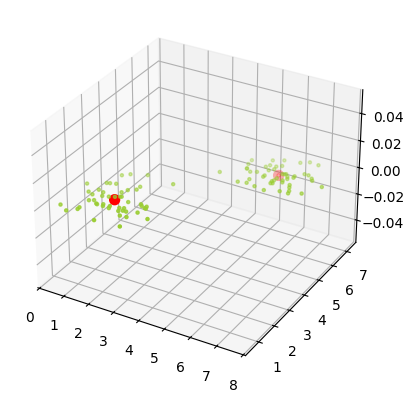

In [74]:
fig = plt.figure()
  
ax = fig.add_subplot(111, projection ='3d')
  
ax.scatter(X[:, 0], X[:, 1], marker ='.', color ="yellowgreen")
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker ='o', color ='red', s=10, linewidth=5,  
                                   zorder=10)
plt.show()


### 2. k-means.

In [75]:
from sklearn.cluster import KMeans

In [76]:
df_3_2 = pd.read_csv('clusters.csv', delimiter=";")

In [77]:
print(df_3_2.head(10))

   Latitud  Longitud
0   8.9784  -83.0378
1   8.9786  -83.0833
2   9.0236  -83.0377
3   8.9786  -83.0833
4   9.0246  -83.3104
5   8.9794  -83.3106
6   8.9343  -83.3562
7   9.0247  -83.3559
8   8.9792  -83.2651
9   8.9792  -83.2651


El algoritmo de `k-means`, define un número de clusters y a partir de estos, agrupa cada dato con su cluster más próximo. 

In [78]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_3_2)
y_kmeans = kmeans.predict(df_3_2)
cluster_centers = kmeans.cluster_centers_

Text(0, 0.5, 'Longitud')

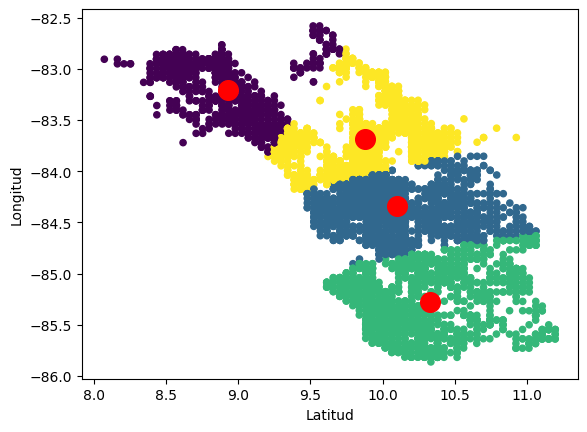

In [79]:
plt.scatter(df_3_2['Latitud'], df_3_2['Longitud'], c=y_kmeans, s=20)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200)
plt.xlabel('Latitud')
plt.ylabel('Longitud')

### 4. Cluster aglomerativo

In [80]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering

In [81]:
df_3_3 = pd.read_csv('clientes.csv', delimiter=";")

In [82]:
print(df_3_3.head())

   Salario  Gasto
0     1500   0.08
1     1500   0.25
2     1600   0.11
3     1600   0.06
4     1700   0.21


La función `dendrogram`, toma los datos y va haciendo clusters entre ellos. En el método `ward`, fusionará aquellos clusters que minimicen la varianza de todos los datos de los clusters involucrados.

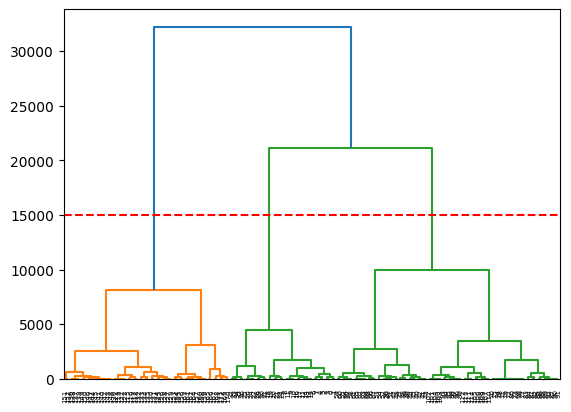

In [83]:
dendrogram(linkage(df_3_3, method='ward',  metric='euclidean'))
plt.axhline(y=15000, color='r', linestyle='--')

La función `AgglomerativeClustering()`, lo que hace ahora es dividir los datos en tres bloques a partir del gráfico anterior, es decir, baja a lo largo del eje y de la gráfica hasta que se formen 3 clusters. En este caso se ve qeu la linea roja punteada ya lo divide en 3 grupos.

In [84]:
agglomerative = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agglomerative.fit(df_3_3)
labels = agglomerative.labels_

In [85]:
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Text(0, 0.5, 'Porcentaje Gasto Mensual')

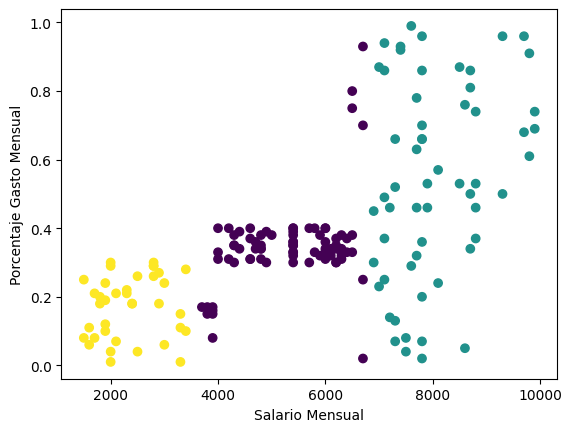

In [86]:
plt.scatter(df_3_3['Salario'], df_3_3['Gasto'], c=labels) 
plt.xlabel('Salario Mensual')
plt.ylabel('Porcentaje Gasto Mensual')

### 4. DBSCAN

In [87]:
from sklearn.cluster import DBSCAN

In [88]:
df_3_4 = pd.read_csv('datos_3_4.csv', delimiter=";")

In [89]:
print(df_3_4.head())

   Variable1  Variable2
0  -4.030499  -6.955657
1  -6.687653   7.467359
2  -3.334960   5.775981
3  -5.812554  -7.506389
4  -6.648924   7.142999


Density-Based Spatial Clustering of Applications with Noise, es un algoritmo que funciona de la siguiente forma. En python tiene los argumentos `eps` y `min_samples`. Dado un conjunto de puntos, define en torno a estos unas bolas de radio `eps`. Dado un punto diremos que es el núcleo de un clúster si dentro de su bola hay al menos `min_samples` puntos. Por lo tanto, un punto pertenece a un cluster si pertenece a la bola de un núcleo o si existe una cadena de puntos con una distancia de menos de `eps` que llegue hasta un núcleo. Si se puede llegar de un núcleo a otro núcleo a través de esta cadena, se fusionaran estos clusters en uno.

In [90]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df_3_4)
labels = dbscan.labels_


In [91]:
print(labels)

[ 0  1  2 -1  1  3  1  1  0  1  1  3  0  1 -1  3  3  2  2  0  3  0 -1  0
  2  2  1  0  3  1  1  3  0  3  1  3 -1  2  3 -1  3  0  2  3  1  2 -1  2
  2  2  0  0  2  0  1  3  2  0  0 -1  2  1  2  3  0  3  1  3  2  3  2  0
  2  2 -1  3  1  0  0  2  2  2  4  3  3 -1  3  1  2  3  0  3  1  1 -1  1
  3  3  2  0  2  1  0  3  3 -1  3  0  1  0  3  2  0  1  3  1  0  3  1  0
  3  2  0  3  1  3  2  2  0  3  3  2  2  1  1  1 -1  3  2  2  2  2  1  0
  0 -1  3  2  3  3  1  0  2 -1  0  4  2 -1  0  1  0  3  2 -1  3  2  1  0
  1  0  1  3  3  2  0  2  0  3 -1  2  0  3  2  3  3  2  1  0  0  0  1  2
  0  3  2 -1  3  0  2  3  0  0  1  0  0  3  2  0  2  1  3  1  1  0  2  1
  2  3  0  0  2  2  0  2  1  0  0  1  0  0  3  0  5  0  3  1 -1  3  2  3
  3  3  3  1  3  3  0  2  0  0  3  3  3  1  3  1  1  0  3  2  1  1  0  0
  3  3  0  3  0  0  3  3  1  2  0  0  0  2  2  2  3  3  1  1  5  3 -1  3
  0  2  1  3  1  0  3  1  0  1  3  0 -1  2 -1  2  1  1  2  0  0 -1  2  0
  0  0  2 -1  1  2  1  1  0 -1  0  3  1  0  2  0  2

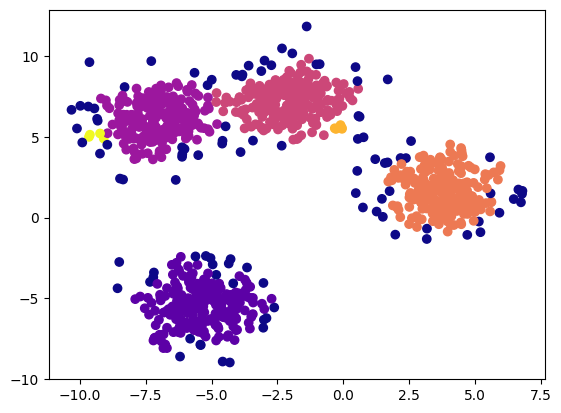

In [92]:
plt.scatter(df_3_4['Variable1'],df_3_4['Variable2'], c=labels, cmap= "plasma")

## 4. Modelos supervisados.

### 1. Regresión lineal.

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
df_4_1 = pd.read_csv('empleados4_1.csv', delimiter=";")

In [95]:
print(df_4_1.head())

      Nombre       Sexo Estado_Civil  Edad  Experiencia  Salario Gerencia  \
0  Alexandro  Masculino   Soltero(a)    22            3     2423       No   
1     Felipa   Femenino   Soltero(a)    26            5     2639       No   
2     Daniel  Masculino    Casado(a)    35           10     3122       No   
3       John  Masculino    Casado(a)    35           13     3431       Sí   
4    Ruperta   Femenino    Casado(a)    54           18     3962       No   

           Departamento  
0            Publicidad  
1             Comercial  
2             Comercial  
3  Servicios al cliente  
4              Producto  


In [96]:
y = df_4_1['Salario'].values.reshape(-1,1)
X = df_4_1['Experiencia'].values.reshape(-1,1)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [98]:
regresion_lineal = LinearRegression()

In [99]:
regresion_lineal.fit(X_train, y_train)

print('Coeficiente de regresión: ', regresion_lineal.coef_)
print('Puntaje de regresión: ',regresion_lineal.score(X_test, y_test))
print('Puntaje de regresión: ',regresion_lineal.score(X_test, y_test))
print('Puntaje de regresión: ',regresion_lineal.score(X_test, y_test))

Coeficiente de regresión:  [[108.58912319]]
Puntaje de regresión:  0.9880783262913273
Puntaje de regresión:  0.9880783262913273
Puntaje de regresión:  0.9880783262913273


Text(0, 0.5, 'Experiencia')

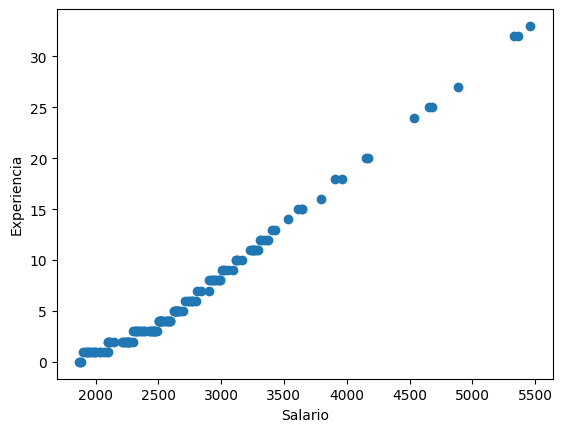

In [100]:
plt.scatter(df_4_1['Salario'], df_4_1['Experiencia']) 
plt.xlabel('Salario')
plt.ylabel('Experiencia')

### 2. Regresión lineal múltiple.

In [101]:
from sklearn import metrics

In [102]:
df_4_2 = pd.read_csv('emisiones4.csv', delimiter=";")

In [103]:
print(df_4_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Marca     91 non-null     object 
 1   Longitud  91 non-null     float64
 2   Anchura   91 non-null     float64
 3   Altura    91 non-null     float64
 4   Maletero  91 non-null     int64  
 5   CO2       91 non-null     int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 4.4+ KB
None


In [104]:
y = df_4_2[['CO2']]
X = df_4_2[['Longitud', 'Anchura', 'Altura']]

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [106]:
regresion_lineal.fit(X_train, y_train)
y_pred=regresion_lineal.predict(X_test)

print("Error absoluto medio: ", metrics.mean_absolute_error(y_test, y_pred))
print("Error cuadrático medio: ", metrics.mean_squared_error(y_test, y_pred))
print("Raíz del error cuadrático medio: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error absoluto medio:  25.604433644330083
Error cuadrático medio:  970.5771062756442
Raíz del error cuadrático medio:  31.154086510049435


### 3. Regresión logística

Funciona como la regresión lineal, pero en vez de ajustar los datos con una función lineal, lo hace a partir de una familia de funciones llamada `Sigmoide`. Estas funciones tienen la siguiente forma:
$$\dfrac{1}{1+e^{-(\beta_0+\beta_1 \cdot x)}}$$
Se trata de calcular los términos reales $\beta_0$ y $\beta_1$ a partir de los datos de entrenamiento.

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
df_4_3 = pd.read_csv('examenes.csv', delimiter=";")

In [109]:
X = df_4_3['Horas'].values.reshape(-1,1)
y = df_4_3['Puntaje']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [111]:
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [112]:
horas_test = np.array([5, 6, 7, 8, 9, 10]).reshape(-1,1)
y_pred = logistic_regression.predict(horas_test)

[69 69 69 69 69 69]


Text(0, 0.5, 'Puntaje')

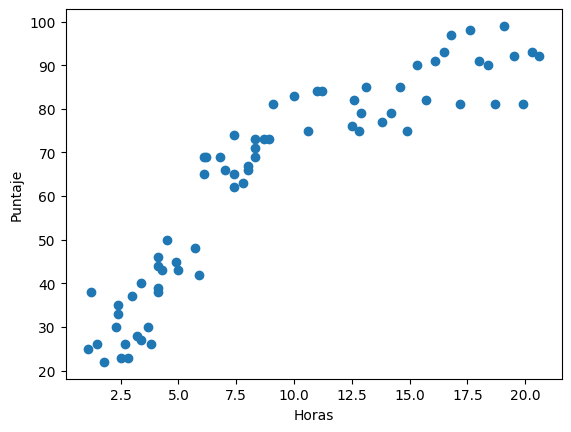

In [113]:
print(y_pred)
plt.scatter(df_4_3['Horas'], df_4_3['Puntaje']) 
plt.xlabel('Horas')
plt.ylabel('Puntaje')

### 4. Árboles de decisión

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons

In [115]:
X, y = make_moons(n_samples=5000, noise=0.3, random_state=42)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [117]:
arbol_decision = DecisionTreeClassifier()
arbol_decision.fit(X_train, y_train)

DecisionTreeClassifier()

In [118]:
precision = arbol_decision.score(X_test, y_test)
print('La precisión es ', precision*100)

La precisión es  87.6


### 5. Random forest

Genera `n_estimators` árboles de decisión, en los cuales selecciona unos vectores aleatorios para realizar la clasificación. Tras esto, asigna la clase dependiendo del conjunto de todos los árboles.

In [119]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [120]:
X, y = make_classification(n_samples=5000,  n_features=20, random_state=3)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [122]:
bosques_aleatorio = RandomForestClassifier(random_state=42)
bosques_aleatorio.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [123]:
precision = bosques_aleatorio.score(X_test, y_test)
print('La precisión es ', precision*100)

La precisión es  97.8


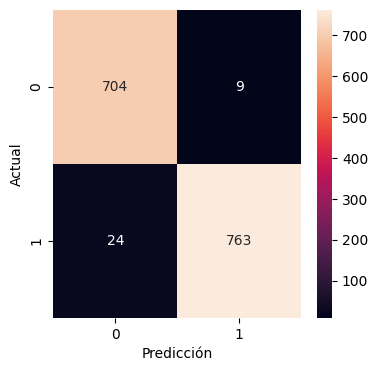

In [124]:
y_pred = bosques_aleatorio.predict(X_test)
matriz_confusion = confusion_matrix(y_test,y_pred)

plt.subplots(figsize = (4,4))
sns.heatmap(matriz_confusion, annot = True, fmt =".0f")
plt.xlabel("Predicción")
plt.ylabel("Actual")
plt.show()

### 6. Detección de valores atípicos.

Para ver aquellos datos que son outliers, usamos la función `LocalOutlierFactor()`. El método `.fit_predict()`, nos devuelve un array con dos posibles valores para cada fila, siendo `1` si es un dato normal y `-1` si es outlier. Los aisla dependiendo de la densidad del punto a partir de la variable `n_neighbors`. 

In [125]:
from sklearn.neighbors import LocalOutlierFactor

In [126]:
df_4_6 = pd.read_csv('datos4.csv', delimiter=";")

In [127]:
local_outlier_factor = LocalOutlierFactor(n_neighbors=20)
local_outlier_factor.fit(df_4_6)

df_4_6['local_outlier'] = local_outlier_factor.fit_predict(df_4_6)

local_outlier
 1    959
-1     41
Name: count, dtype: int64


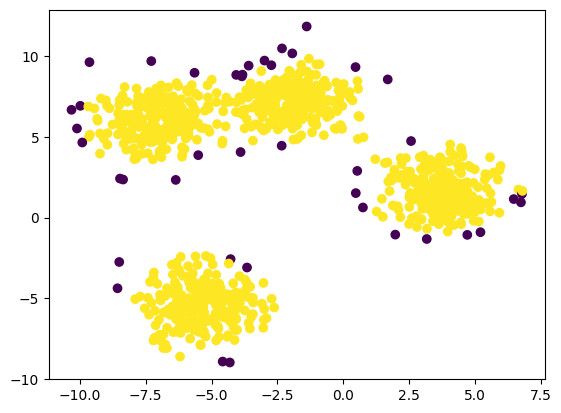

In [128]:
print(df_4_6['local_outlier'].value_counts())
plt.scatter(df_4_6['Variable1'], df_4_6['Variable2'], c=df_4_6['local_outlier']) 

### Isolation forest.

Este algoritmo es útil para detectar outiers en vectores con varias features. Crea múltiples árboles de decisión de forma aleatoria tomando una característica y un valor de división al azar. Si un valor se aisla de forma rápida se le asigna una puntuación baja, por lo que considerará outliers aquellos valores con una baja puntuación.

In [129]:
from sklearn.ensemble import IsolationForest

In [130]:
df_4_7 = pd.read_csv('empleados4_7.csv', delimiter=";")

In [131]:
print(df_4_7.head())

      Nombre       Sexo Estado_Civil  Edad  Experiencia    Salario Gerencia  \
0  Alexandro  Masculino   Soltero(a)    22            3       2423       No   
1     Felipa   Femenino   Soltero(a)    26            5       2639       No   
2     Daniel  Masculino    Casado(a)    35           10  312200000       No   
3       John  Masculino    Casado(a)    35           13       3431       Sí   
4    Ruperta   Femenino    Casado(a)    54           18   39620000       No   

           Departamento  
0            Publicidad  
1             Comercial  
2             Comercial  
3  Servicios al cliente  
4              Producto  


In [132]:
isolation_forest = IsolationForest(random_state=42)
isolation_forest.fit(df_4_7[['Salario']])


IsolationForest(random_state=42)

In [133]:
df_4_7['Normal'] = isolation_forest.predict(df_4_7[['Salario']])

In [134]:
print(df_4_7[['Salario', 'Normal']])

         Salario  Normal
0           2423       1
1           2639       1
2      312200000      -1
3           3431       1
4       39620000      -1
..           ...     ...
138         2510       1
139         2530       1
140         2760       1
141  36160000000      -1
142         3245       1

[143 rows x 2 columns]


In [135]:
print(df_4_7['Normal'].value_counts())

Normal
 1    131
-1     12
Name: count, dtype: int64


### 8. Aumento del gradiente.

Predice los valores mediante la combinación de árboles de decisión simples, mediante varias iteriaciones, donde cada nuevo árbol corrige los errores del anterior minimizando la función pérdida mediante el gradiente descendiente.

In [136]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [137]:
X, y = make_regression()

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [139]:
gradient_boosting_regressor = GradientBoostingRegressor()
gradient_boosting_regressor.fit(X_train, y_train)

pred_y=gradient_boosting_regressor.predict(X_test)
print("Coeficiente de determinación o R2: ", r2_score(y_test,pred_y)*100)

Coeficiente de determinación o R2:  64.29099097700309


### 9. Bayesiano Ingenuo Multinomial

Dadas varias categorías $C_k$, para una cadena de texto $X$, extrae tokens y la asigna una categoría $C_k$ maximizando la fórmula del Teorema de Bayes:
$$P(X|C_k) = \dfrac{P(X|C_k) \cdot P(C_k)}{P(X)}

In [140]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score

In [141]:
df_4_9 = pd.read_csv('solicitudes.csv', delimiter=";")

In [142]:
X = df_4_9['Asunto']
y = df_4_9['Categoría']

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [144]:
count_vectorizer = CountVectorizer()
X_train_dtm = count_vectorizer.fit_transform(X_train)

In [145]:
X_test_dtm = count_vectorizer.transform(X_test)

In [146]:
multinomia_nb = MultinomialNB()
multinomia_nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [147]:
y_pred_class = multinomia_nb.predict(X_test_dtm)

In [148]:
print('La precisión es: ', accuracy_score(y_test, y_pred_class))

print('F1 Score: ', f1_score(y_test, y_pred_class, average="macro"))

La precisión es:  0.6666666666666666
F1 Score:  0.625
